# Cross analysis

Now that we have analyzed each dataset individually, we can start to cross analyze them so that we 

### Importing libraries

In [15]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from Project.Helpers.Classes import User

### Setting the parameters

In [16]:
def plot_running_average_frequency(users, user_ids, analysis_type, sample_size, window_size=100):
    users_to_analyze = [user for user in users if user.id in user_ids]
    
    plt.figure(figsize=(16, 8))
    
    
    is_single = len(users_to_analyze) == 1
    count_positives = {}
    count = {}
    
    for user in users_to_analyze: 
        # Load the classifications
        classifications = pd.read_csv(f'../Output_data/classifications_{user.username}.csv')
        positive_frequency = []
        negative_frequency = []
    
        # Calculate running watch/like frequency
        for i in range(min(sample_size, len(classifications['reaction']))):
            # Determine the start of the window
            start_index = max(0, i - window_size + 1)
            # Slice the window from the reactions list
            positive_window = classifications['positive'][start_index:i+1]
            negative_window = classifications['negative'][start_index:i+1]
            # Calculate the sum of the window (number of occurrences of the reaction in the window)
            count_positive = sum(positive_window)
            count_negative = sum(negative_window)
    
            # Calculate the average frequency
            average_frequency_positive = count_positive / window_size * 100
            positive_frequency.append(average_frequency_positive)
    
            average_frequency_negative = count_negative / window_size * 100
            negative_frequency.append(average_frequency_negative)
    
        run_type = user.username.split('percent')[-1]
        if run_type[-1] not in ['r', 'l']:
            run_type = run_type[:-1]
        label = f'{run_type.capitalize()} Frequency {user.username.split("percent")[0]}%'
        if is_single:
                plt.plot(range(1, len(positive_frequency) + 1), positive_frequency, linestyle='-', linewidth=1)
        else:
            plt.plot(range(1, len(positive_frequency) + 1), positive_frequency, linestyle='-', linewidth=1, label=label)
    
        count[label] = len(classifications['positive'])
        count_positives[label] = classifications['positive'].sum()
    
    
    plt.xlabel('Number of Videos')
    plt.ylabel('Average Frequency in %')
    #plt.title(f'Running Average Frequency of Positive Reactions Over the Last {window_size} Rows for all Reactions')
    if not is_single:
        plt.legend(title='Categories', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)  # Position legend outside the plot
    plt.grid(True)
    plt.tight_layout()  # Adjust layout to make room for the legend
    plt.savefig(f'../Output_data/figures/running_frequency_reactions_{analysis_type}_last_{window_size}_rows.png')
    plt.show()
    return count, count_positives

In [17]:
def plot_running_average_frequency_smooth(users, user_ids, analysis_type, sample_size, window_size=100):
   
    users_to_analyze = [user for user in users if user.id in user_ids]
    
    plt.figure(figsize=(16, 8))
    
    
    count_positives = {}
    count = {}
    
    for user in users_to_analyze: 
        # Load the classifications
        classifications = pd.read_csv(f'../Output_data/classifications_{user.username}.csv')
    
        window_size = 100
        positive_frequency = []
        negative_frequency = []
        
        # Calculate running watch/like frequency
        for i in range(min(sample_size, len(classifications['reaction']))):
            # Determine the start of the window
            start_index = max(0, i - window_size + 1)
            # Slice the window from the reactions list
            positive_window = classifications['positive'][start_index:i+1]
            negative_window = classifications['negative'][start_index:i+1]
            # Calculate the sum of the window (number of occurrences of the reaction in the window)
            count_positive = sum(positive_window)
            count_negative = sum(negative_window)
            
            # Calculate the average frequency
            average_frequency_positive = count_positive / window_size * 100
            positive_frequency.append(average_frequency_positive)
            
            average_frequency_negative = count_negative / window_size * 100
            negative_frequency.append(average_frequency_negative)
            
        run_type = user.username.split('percent')[-1]
        if run_type[-1] not in ['r', 'l']:
            run_type = run_type[:-1]
        label = f'{run_type.capitalize()} Frequency {user.username.split("percent")[0]}%'
    
    
        # Assuming positive_frequency and negative_frequency are your data
        positive_series = pd.Series(positive_frequency)
        negative_series = pd.Series(negative_frequency)
        
        # Calculate rolling averages
        smooth_window_size = 5  # Adjust window size as needed
        positive_smooth = positive_series.rolling(window=smooth_window_size).mean()
        negative_smooth = negative_series.rolling(window=smooth_window_size).mean()
        
        # Plot the results
        if run_type == 'skipper':
            plt.plot(positive_smooth, label=label, color='grey')
        else:
            plt.plot(positive_smooth, label=label)
        count[label] = len(classifications['positive'])
        count_positives[label] = classifications['positive'].sum()
    
    
    plt.xlabel('Number of Videos')
    plt.ylabel('Average Frequency in %')
    #plt.title(f'Running Average Frequency of Positive Reactions Over the Last {window_size} Rows for all Reactions')
    plt.legend(title='Categories', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)  # Position legend outside the plot
    plt.grid(True)
    plt.tight_layout()  # Adjust layout to make room for the legend
    plt.savefig(f'../Output_data/figures/running_frequency_reactions_{analysis_type}_last_{window_size}_rows_smooth.png')
    plt.show()
    return count, count_positives

In [18]:
def plot_percentage_positive_reactions(count, count_positives, analysis_type):
    for key in count.keys():
        count_positives[key] = count_positives[key] / count[key] * 100
    #sort the count_positives by the percentage of positive reactions
    count_positives = dict(sorted(count_positives.items(), key=lambda item: -item[1]))
    print(count_positives)
    plt.figure(figsize=(16, 8))
    plt.bar(count_positives.keys(), count_positives.values())
    plt.ylabel('Percentage of Positive Reactions')
    plt.xlabel('Run Type')
    plt.savefig(f'../Output_data/figures/percentage_positive_reactions_{analysis_type}.png')

In [19]:

with open('../Input_data/users.json') as f:
    users = json.load(f)
    
users = [User(user) for user in users]

users.sort(key=lambda x: int(x.username.split('percent')[0]))
users.sort(key=lambda x: x.username.split('percent')[-1])

print('ID \t Username')
for user in users:
    username = user.username.split('percent')
    print(f'{user.id} \t {username[0]}% {username[-1]}')

ID 	 Username
22 	 100% all
14 	 10% disliker
15 	 50% disliker
16 	 100% disliker
24 	 10% disliker2
25 	 100% disliker2
7 	 10% liker
8 	 25% liker
9 	 50% liker
10 	 75% liker
11 	 100% liker
13 	 100% liker2
23 	 100% liker3
27 	 100% liker4
17 	 10% sharer
18 	 25% sharer
19 	 50% sharer
20 	 75% sharer
21 	 100% sharer
26 	 10% sharer2
28 	 100% skipper
3 	 10% watcher
4 	 25% watcher
5 	 50% watcher
6 	 75% watcher
2 	 100% watcher
12 	 75% watcher2


In [20]:
runs = [
    # {
    #     'user_ids': [2,22, 25, 27, 21, 28],
    #     'analysis_type': 'all_reactions',
    #     'sample_size': 550
    # },
    # {
    #     'user_ids': [27,10,9,8,7, 28],
    #     'analysis_type': 'like',
    #     'sample_size': 1000
    # },
    # {
    #     'user_ids': [2, 3, 4, 5, 12, 28],
    #     'analysis_type': 'watch',
    #     'sample_size': 1000
    # },
    # {
    #     'user_ids': [25, 28],
    #     'analysis_type': 'dislike',
    #     'sample_size': 550
    # },
    # {
    #     'user_ids': [28],
    #     'analysis_type': 'skip',
    #     'sample_size': 550
    # },
    # {
    #     'user_ids': [21, 28],
    #     'analysis_type': 'share',
    #     'sample_size': 550
    # },
    # {
    #     'user_ids': [22, 28],
    #     'analysis_type': 'all',
    #     'sample_size': 550
    # },
    {
        'user_ids': [2,22, 12, 27, 10, 5],
        'analysis_type': 'high_positive',
        'sample_size': 1000
    }
]


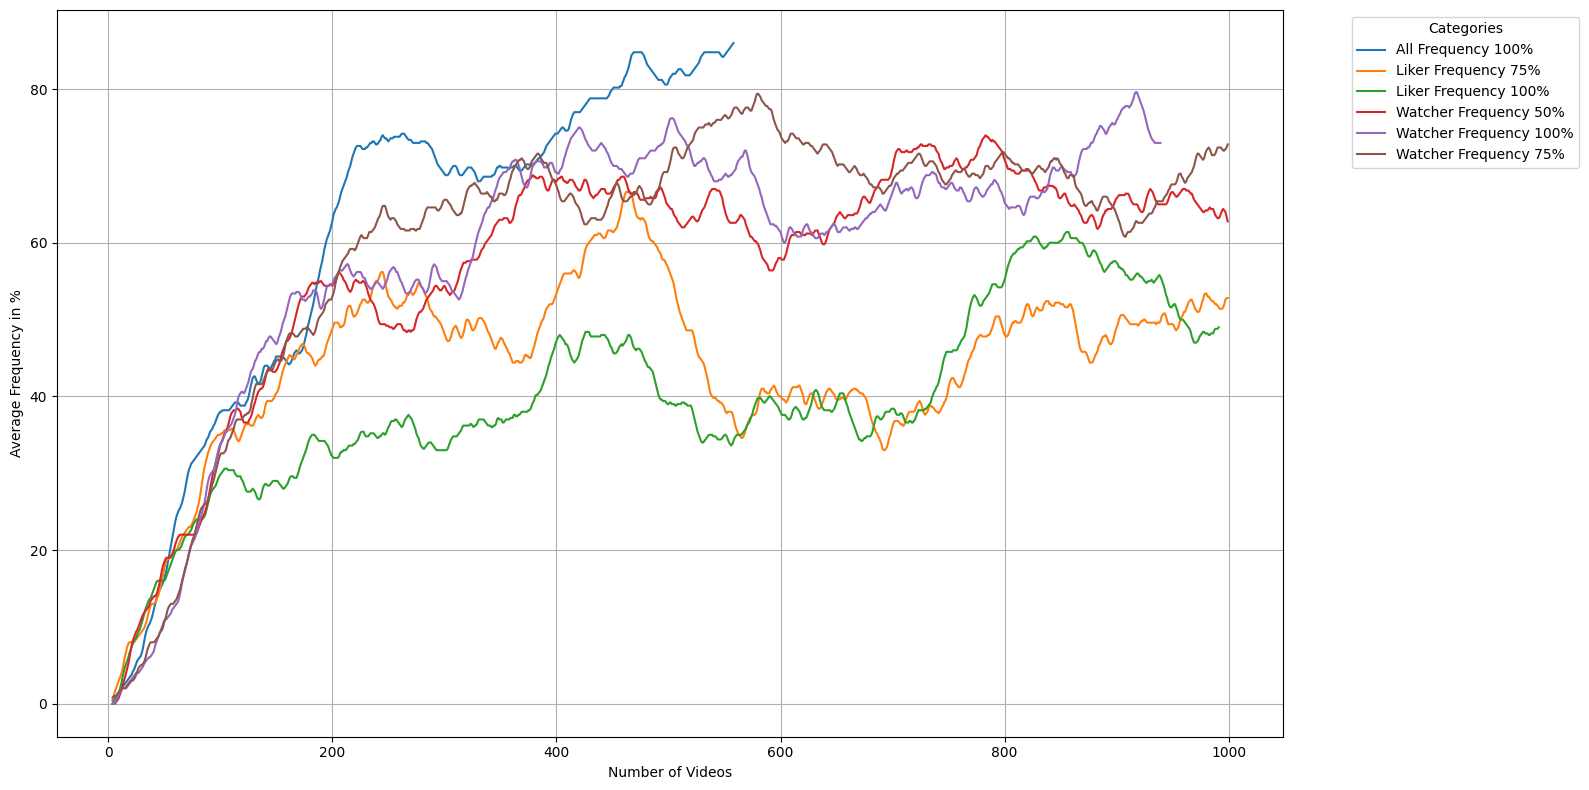

{'All Frequency 100%': 67.79964221824687, 'Watcher Frequency 75%': 63.9, 'Watcher Frequency 100%': 62.34042553191489, 'Watcher Frequency 50%': 60.199999999999996, 'Liker Frequency 75%': 46.830652790917696, 'Liker Frequency 100%': 42.03629032258064}


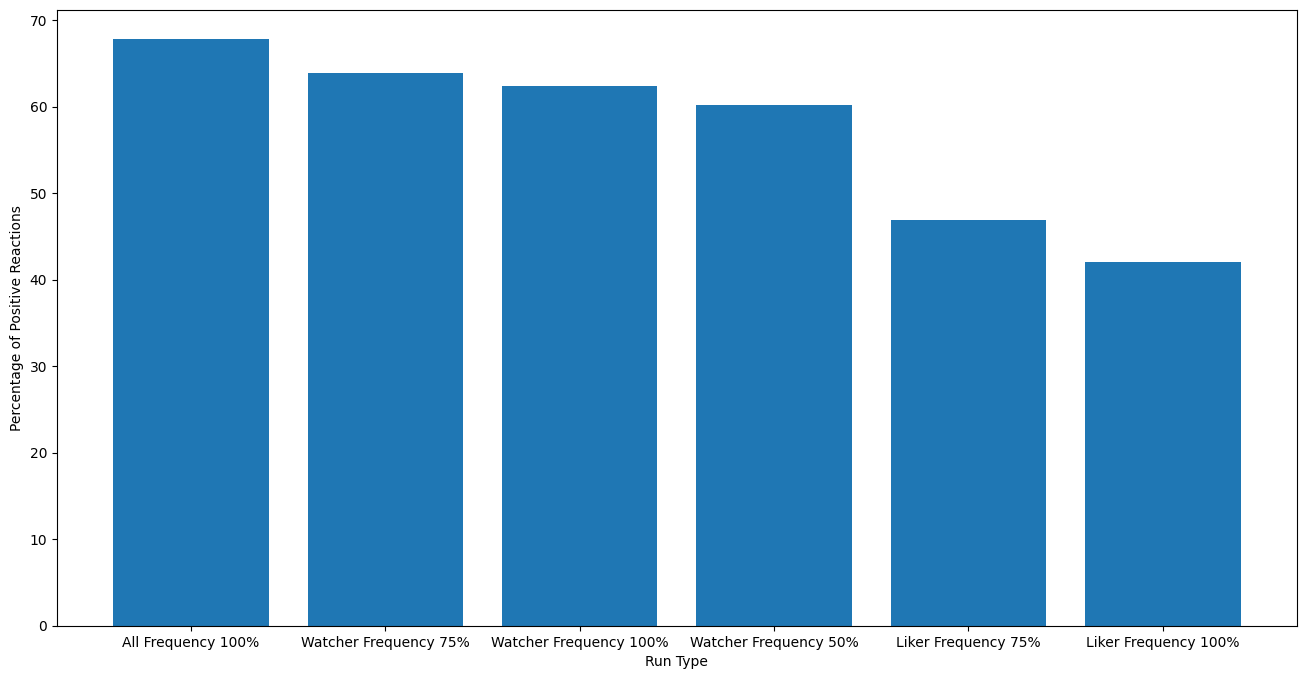

In [21]:
for run in runs:
    count, count_positives = plot_running_average_frequency_smooth(users, run['user_ids'], run['analysis_type'], run['sample_size'])
    plot_percentage_positive_reactions(count, count_positives, run['analysis_type'])